In [3]:
from google.colab import drive
drive.mount(('/content/drive'))

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
%cd drive/MyDrive/facial_expression/

/content/drive/MyDrive/facial_expression


In [9]:
!ls

fer2013  fer2013_emotionsseparated


In [10]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Separating data

In [16]:
data_org = pd.read_csv("fer2013/fer2013.csv")
data_org.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [17]:
data_org

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [18]:
data_org.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [24]:
data_org.groupby(['Usage']).count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [25]:
for i, data in data_org.groupby('Usage'):
    data.to_csv("{}.csv".format(i))

In [28]:
test_private = pd.read_csv("PrivateTest.csv")
test_private

,Unnamed: 0,emotion,pixels,Usage
0,32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
1,32299,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest
2,32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest
3,32301,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest
4,32302,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest
...,...,...,...,...
3584,35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
3585,35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
3586,35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
3587,35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [29]:
test_public = pd.read_csv("PublicTest.csv")
test_public

,Unnamed: 0,emotion,pixels,Usage
0,28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
1,28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
2,28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
3,28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
4,28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest
...,...,...,...,...
3584,32293,4,178 176 172 173 173 174 176 173 166 166 206 22...,PublicTest
3585,32294,3,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...,PublicTest
3586,32295,4,255 255 255 255 255 255 255 255 255 255 255 25...,PublicTest
3587,32296,4,33 25 31 36 36 42 69 103 132 163 175 183 187 1...,PublicTest


In [30]:
train = pd.read_csv("Training.csv")
train

,Unnamed: 0,emotion,pixels,Usage
0,0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...,...
28704,28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


## Emotion Distribution

In [58]:
emotion_label = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

[Text(0, 0, 'Angry'),
 Text(0, 0, 'Disgust'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Happy'),
 Text(0, 0, 'Sad'),
 Text(0, 0, 'Surprise'),
 Text(0, 0, 'Neutral')]

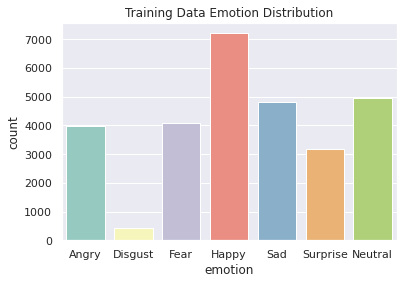

In [77]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
ax1 = sns.countplot(x="emotion", data=train, palette= "Set3")
ax1.set_title("Training Data Emotion Distribution");
ax1.set_xticklabels(emotion_label.values())

[Text(0, 0, 'Angry'),
 Text(0, 0, 'Disgust'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Happy'),
 Text(0, 0, 'Sad'),
 Text(0, 0, 'Surprise'),
 Text(0, 0, 'Neutral')]

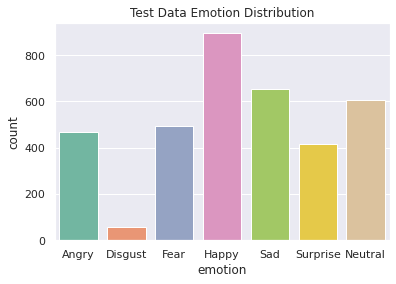

In [80]:
ax2 = sns.countplot(x="emotion", data=test_public, palette="Set2")
ax2.set_title("Test Data Emotion Distribution");
ax2.set_xticklabels(emotion_label.values())

[Text(0, 0, 'Angry'),
 Text(0, 0, 'Disgust'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Happy'),
 Text(0, 0, 'Sad'),
 Text(0, 0, 'Surprise'),
 Text(0, 0, 'Neutral')]

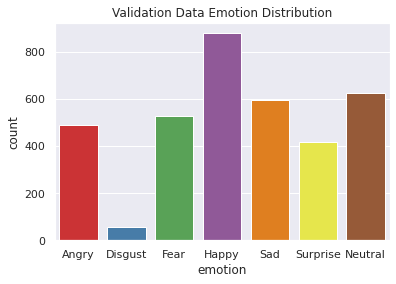

In [83]:
ax3 = sns.countplot(x="emotion", data=test_private, palette="Set1")
ax3.set_title("Validation Data Emotion Distribution");
ax3.set_xticklabels(emotion_label.values())

### Separating Training Data based on Emotions

In [ ]:
emotion_split = train.groupby(['emotion']).count()
emotion_split

In [96]:
for j, dx in train.groupby('emotion'):
    dx.to_csv("{}.csv".format(j))

In [105]:
#sample
disgust = pd.read_csv("1.csv")
disgust.head()

,Unnamed: 0,Unnamed: 0.1,emotion,pixels,Usage
0,1,28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
1,82,28791,1,254 253 252 255 227 83 50 49 38 41 43 36 57 14...,PublicTest
2,142,28851,1,70 86 98 135 155 150 138 125 111 99 89 87 85 8...,PublicTest
3,199,28908,1,108 111 110 128 134 142 141 140 142 137 143 14...,PublicTest
4,230,28939,1,7 21 20 23 63 75 69 65 66 68 78 89 104 122 132...,PublicTest


### Separating Testing Data based on Emotions

In [100]:
%cd /content/drive/My Drive/facial_expression/test

/content/drive/My Drive/facial_expression/test


In [101]:
for i, data in test_public.groupby('emotion'):
    data.to_csv("{}.csv".format(i))

In [103]:
#sample
happy = pd.read_csv("3.csv")
happy.head()

,Unnamed: 0,Unnamed: 0.1,emotion,pixels,Usage
0,4,28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest
1,5,28714,3,235 233 223 109 34 37 34 31 28 38 56 69 106 13...,PublicTest
2,10,28719,3,180 175 169 161 157 158 157 154 155 157 162 16...,PublicTest
3,19,28728,3,22 9 17 40 41 40 28 19 39 67 84 93 97 104 103 ...,PublicTest
4,30,28739,3,106 121 122 124 139 138 134 134 139 141 153 15...,PublicTest


### Separating Validation data based on emotions

In [86]:
for i, data in test_private.groupby('emotion'):
    data.to_csv("{}.csv".format(i))

In [104]:
#sample
neutral = pd.read_csv("6.csv")
neutral.head()

,Unnamed: 0,Unnamed: 0.1,emotion,pixels,Usage
0,3,28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
1,14,28723,6,22 28 27 28 26 28 31 33 33 30 32 23 19 44 75 1...,PublicTest
2,31,28740,6,59 76 97 81 99 133 142 142 141 143 141 138 138...,PublicTest
3,33,28742,6,56 18 21 19 18 16 34 55 63 63 63 62 59 58 58 6...,PublicTest
4,36,28745,6,31 32 25 23 31 43 37 27 32 57 107 134 146 152 ...,PublicTest
